# 1.Deeptools QC

In [2]:
%%bash
multiBamSummary bins \
    -b $(ls /home/lzz/hic/data/*/*.40x80kb.PC1.bw | grep T -v) \
    --labels S S S B B B \
    -out scores_per_bin.npz --outRawCounts scores_per_bin.tab

Number of bins found: 273121


In [3]:
%%bash
plotCorrelation \
    -in scores_per_bin.npz \
    --corMethod pearson --skipZeros \
    --plotTitle "Pearson Correlation of Average Scores Per Transcript" \
    --whatToPlot scatterplot \
    -o scatterplot_PearsonCorr_bigwigScores.png   \
    --outFileCorMatrix PearsonCorr_bigwigScores.tab


Outliers were detected in the data. Consider using the --removeOutliers parameter to avoid a bias in the pearson correlation.


In [4]:
%%bash
plotCorrelation \
    -in scores_per_bin.npz \
    --corMethod spearman --skipZeros \
    --plotTitle "Spearman Correlation of Read Counts" \
    --whatToPlot heatmap --colorMap RdYlBu --plotNumbers \
    -o heatmap_SpearmanCorr_readCounts.png   \
    --outFileCorMatrix SpearmanCorr_readCounts.tab

In [5]:
%%bash
plotPCA -in scores_per_bin.npz \
    -o PCA_readCounts.png \
    -T "PCA of read counts"

# 2.HiC AB deeptools

In [78]:
%%bash
ls /home/lzz/hic/data/*/*.40x80kb.PC1.bedGraph | while read id; do
echo $id ${id/.bedGraph/.bw}
/home/lzz/biotools/uscs/bedGraphToBigWig $id /home/lzz/hic/data/chrom_mm10.sizes ${id/.bedGraph/.bw};
done

/home/lzz/hic/data/B1/B1.40x80kb.PC1.bedGraph /home/lzz/hic/data/B1/B1.40x80kb.PC1.bw
/home/lzz/hic/data/B2/B2.40x80kb.PC1.bedGraph /home/lzz/hic/data/B2/B2.40x80kb.PC1.bw
/home/lzz/hic/data/B3/B3.40x80kb.PC1.bedGraph /home/lzz/hic/data/B3/B3.40x80kb.PC1.bw
/home/lzz/hic/data/S1/S1.40x80kb.PC1.bedGraph /home/lzz/hic/data/S1/S1.40x80kb.PC1.bw
/home/lzz/hic/data/S2/S2.40x80kb.PC1.bedGraph /home/lzz/hic/data/S2/S2.40x80kb.PC1.bw
/home/lzz/hic/data/T1/T1.40x80kb.PC1.bedGraph /home/lzz/hic/data/T1/T1.40x80kb.PC1.bw
/home/lzz/hic/data/T2/T2.40x80kb.PC1.bedGraph /home/lzz/hic/data/T2/T2.40x80kb.PC1.bw


## 2.1 Up

In [157]:
import pandas as pd
dat = pd.read_csv('/home/lzz/atac/output/up_regulated_diff_anno.csv', index_col=0)
dat.head()

PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10)  \
17                B21-3A_FKDL190740160-1a_peak_164748b                                                     
39                B21-1A_FKDL190740158-1a_peak_406022b                                                     
41                 T21-2A_FKDL190740162-1a_peak_292672                                                     
75                  T21-3A_FKDL190740163-1a_peak_84721                                                     
143               S21-3A_FKDL190740157-1a_peak_345439c                                                     

       Chr      Start        End Strand  Peak Score  Focus Ratio/Region Size  \
17   chr14   31669753   31670252      +           0                      NaN   
39    chr6  120077066  120077565      +           0                      NaN   
41    chr2  148536453  148536952      +           0                      NaN   
75   chr12   99213176   99213675      +           0                      NaN   
143   chr6  120082854  120083353      +           0                      NaN   

     Annotation  Detailed Annotation  Distance to TSS Nearest PromoterID  \
17   Intergenic                  NaN          28945.0          NM_025295   
39   Intergenic                  NaN         -16065.0          NM_016718   
41   Intergenic                  NaN         -93167.0          NM_010740   
75       intron                  NaN         -50617.0          NR_038130   
143  Intergenic                  NaN         -10277.0          NM_016718   

     Entrez ID Nearest Unigene Nearest Refseq     Nearest Ensembl  \
17     26363.0       Mm.282679      NM_025295  ENSMUSG00000021900   
39     29862.0       Mm.103668      NM_016718  ENSMUSG00000041377   
41     17064.0          Mm.681      NM_010740  ENSMUSG00000027435   
75     67639.0        Mm.87374      NR_038130  ENSMUSG00000113210   
143    29862.0       Mm.103668      NM_016718  ENSMUSG00000041377   

         Gene Name                                         Gene Alias  \
17             Btd                                                  -   
39           Ninj2                                                  -   
41            Cd93  6030404G09Rik|AA145088|AA4.1|AW555904|C1qr1|C1...   
75   4930474N09Rik                                                  -   
143          Ninj2                                                  -   

               Gene Description       Gene Type  
17                  biotinidase  protein-coding  
39                   ninjurin 2  protein-coding  
41                 CD93 antigen  protein-coding  
75   RIKEN cDNA 4930474N09 gene           ncRNA  
143                  ninjurin 2  protein-coding

In [158]:
dat_bed = dat.iloc[:, 1:4]
print(dat_bed.shape)
dat_bed.head()

(680, 3)


Chr      Start        End
17   chr14   31669753   31670252
39    chr6  120077066  120077565
41    chr2  148536453  148536952
75   chr12   99213176   99213675
143   chr6  120082854  120083353

In [159]:
dat_bed.to_csv('/home/lzz/atac/output/up_regulated_diff_anno.bed', sep='\t', header=False, index=False)

In [254]:
%env res=100
res = 100

env: res=100


In [256]:
%%bash
computeMatrix reference-point \
    --referencePoint center \
    -b ${res}000 -a ${res}000 \
    -R /home/lzz/atac/output/up_regulated_diff_anno.bed \
    -S $(ls /home/lzz/hic/data/*/*.40x80kb.PC1.bw | grep T -v) \
    --skipZeros \
    -o /home/lzz/atac/output/deeptools/matrix_bs_up_${res}k_center.gz \
    --outFileSortedRegions /home/lzz/atac/output/deeptools/matrix_bs_up_${res}k_center.bed

In [257]:
%%bash
plotProfile -m /home/lzz/atac/output/deeptools/matrix_bs_up_${res}k_center.gz \
    -out /home/lzz/atac/output/deeptools/matrix_bs_up_${res}k_center.png \
    --perGroup \
    --numPlotsPerRow 2 \
    --dpi 300 \
    --plotHeight 10 \
    --plotWidth 12 \
    --samplesLabel B1 B2 B3 S1 S2 \
    --yAxisLabel "Average PC1 value"

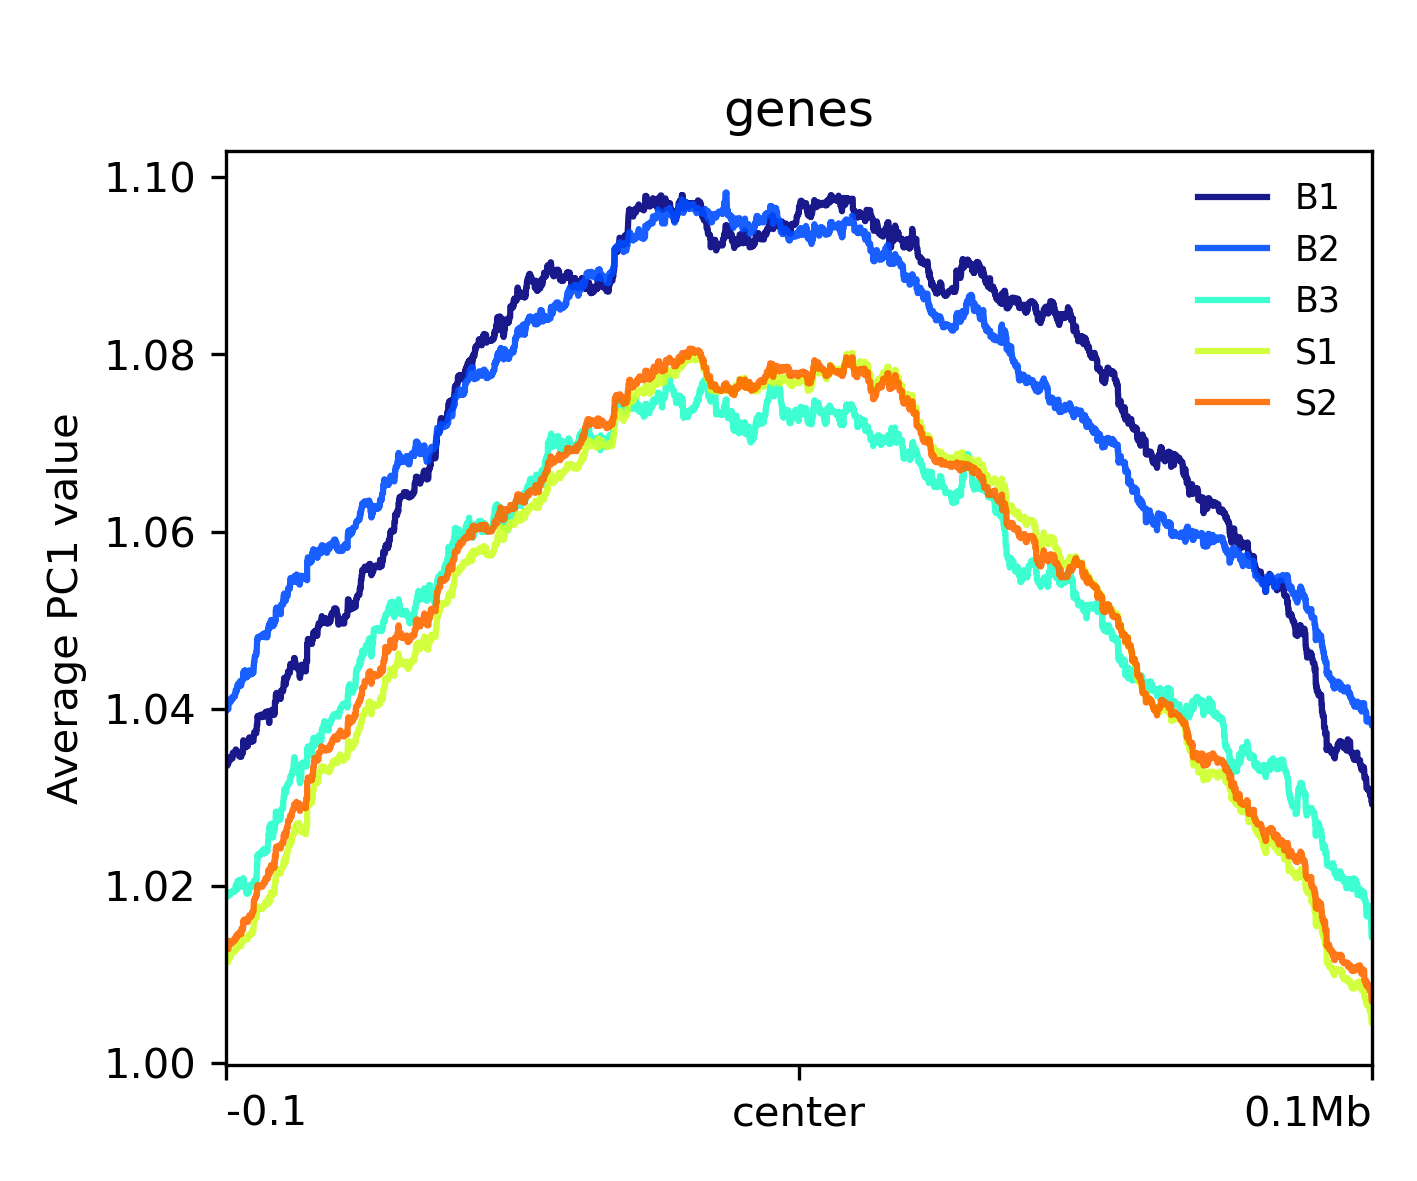

In [258]:
from IPython.display import Image
Image(filename=f'/home/lzz/atac/output/deeptools/matrix_bs_up_{res}k_center.png', width=400, height=400)

## 2.2 Down

In [160]:
import pandas as pd
dat = pd.read_csv('/home/lzz/atac/output/down_regulated_diff_anno.csv', index_col=0)
dat.head()

PeakID (cmd=annotatePeaks.pl /mnt/i/Suspended/ATAC-seq/mm10_t3_atac/Runtime/data/peak_info.bed mm10)  \
16                 S21-2A_FKDL190740156-1a_peak_112861                                                     
51                B21-1A_FKDL190740158-1a_peak_473156e                                                     
118               T21-2A_FKDL190740162-1a_peak_416506d                                                     
254               S21-2A_FKDL190740156-1a_peak_269106b                                                     
303                S21-2A_FKDL190740156-1a_peak_206947                                                     

       Chr      Start        End Strand  Peak Score  Focus Ratio/Region Size  \
16   chr12   85818369   85818868      +           0                      NaN   
51    chr8  121084058  121084557      +           0                      NaN   
118   chr6   72899613   72900112      +           0                      NaN   
254   chr2   14055831   14056330      +           0                      NaN   
303  chr16   91597556   91598055      +           0                      NaN   

       Annotation  Detailed Annotation  Distance to TSS Nearest PromoterID  \
16            TTS                  NaN           6275.0       NM_001360451   
51   promoter-TSS                  NaN            -79.0          NM_010426   
118  promoter-TSS                  NaN            117.0          NM_019715   
254  promoter-TSS                  NaN            -45.0       NM_001012396   
303  promoter-TSS                  NaN           -125.0          NM_030018   

     Entrez ID Nearest Unigene Nearest Refseq     Nearest Ensembl Gene Name  \
16     58520.0       Mm.143795      NM_021446  ENSMUSG00000021252     Erg28   
51     15227.0        Mm.33897      NM_010426  ENSMUSG00000042812     Foxf1   
118    74287.0        Mm.29194      NM_019715  ENSMUSG00000055239     Kcmf1   
254    30963.0       Mm.241205      NM_013935  ENSMUSG00000063275     Hacd1   
303    77975.0       Mm.290341      NM_030018  ENSMUSG00000022964   Tmem50b   

                                            Gene Alias  \
16   0610007P14Rik|1190004E09Rik|AU019315|C77855|ORF11   
51           AI450827|FREAC1|Foxf1a|Freac-1|HFH-8|Hfh8   
118                          1700094M07Rik|Debt91|Pmcf   
254                                              Ptpla   
303                    AU015466|AU019872|B230114J08Rik   

                          Gene Description       Gene Type  
16              ergosterol biosynthesis 28  protein-coding  
51                         forkhead box F1  protein-coding  
118  potassium channel modulatory factor 1  protein-coding  
254        3-hydroxyacyl-CoA dehydratase 1  protein-coding  
303              transmembrane protein 50B  protein-coding

In [161]:
dat_bed = dat.iloc[:, 1:4]
print(dat_bed.shape)
dat_bed.head()

(619, 3)


Chr      Start        End
16   chr12   85818369   85818868
51    chr8  121084058  121084557
118   chr6   72899613   72900112
254   chr2   14055831   14056330
303  chr16   91597556   91598055

In [162]:
dat_bed.to_csv('/home/lzz/atac/output/down_regulated_diff_anno.bed', sep='\t', header=False, index=False)

In [227]:
%env res=100
res = 100

env: res=100


In [224]:
%%bash
computeMatrix reference-point \
    --referencePoint center \
    -b ${res}000 -a ${res}000 \
    -R /home/lzz/atac/output/down_regulated_diff_anno.bed \
    -S $(ls /home/lzz/hic/data/*/*.40x80kb.PC1.bw | grep T -v) \
    --skipZeros \
    -o /home/lzz/atac/output/deeptools/matrix_bs_dw_${res}k_center.gz \
    --outFileSortedRegions /home/lzz/atac/output/deeptools/matrix_bs_dw_${res}k_center.bed

Skipping chrX:170674434-170674933, due to being absent in the computeMatrix output.


In [252]:
%%bash
plotProfile -m /home/lzz/atac/output/deeptools/matrix_bs_dw_${res}k_center.gz \
    -out /home/lzz/atac/output/deeptools/matrix_bs_dw_${res}k_center.png \
    --perGroup \
    --numPlotsPerRow 2 \
    --dpi 300 \
    --plotHeight 10 \
    --plotWidth 12 \
    --samplesLabel B1 B2 B3 S1 S2 \
    --yAxisLabel "Average PC1 value"

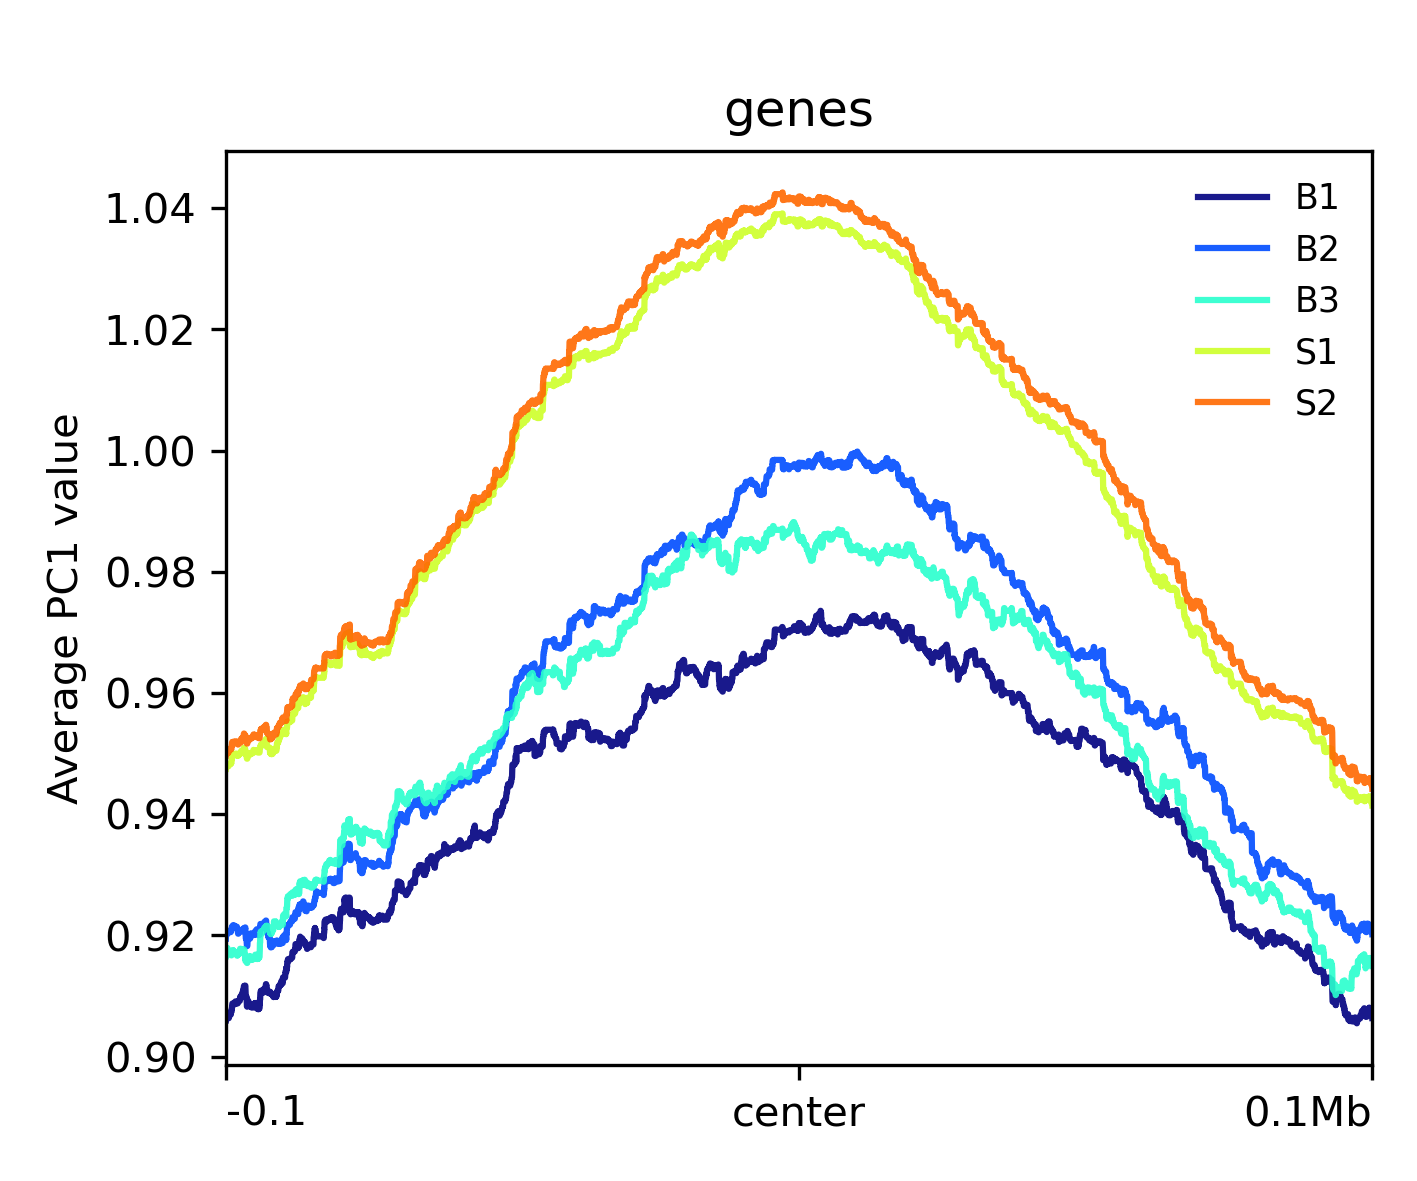

In [253]:
from IPython.display import Image
Image(filename=f'/home/lzz/atac/output/deeptools/matrix_bs_dw_{res}k_center.png', width=400, height=400)

## 2.3 plot

In [172]:
%%bash
computeMatrix reference-point \
    --referencePoint center \
    -b 240000 -a 240000 \
    -R /home/lzz/atac/output/up_regulated_diff_anno.bed /home/lzz/atac/output/down_regulated_diff_anno.bed \
    -S $(ls /home/lzz/hic/data/*/*.40x80kb.PC1.bw | grep T -v) \
    --skipZeros \
    -o /home/lzz/atac/output/deeptools/matrix_bs_all_240k_center.gz \
    --outFileSortedRegions /home/lzz/atac/output/deeptools/matrix_bs_all_240k_center.bed

Skipping chrX:170674434-170674933, due to being absent in the computeMatrix output.


In [173]:
%%bash
plotProfile -m /home/lzz/atac/output/deeptools/matrix_bs_all_240k_center.gz \
    -out /home/lzz/atac/output/deeptools/matrix_bs_all_240k_center.png \
    --perGroup \
    --numPlotsPerRow 2 \
    --dpi 300 \
    --plotHeight 10 \
    --plotWidth 12 \
    --samplesLabel B1 B2 B3 S1 S2 \
    --regionsLabel "Hyper (n=680)" "Hypo (n=620)" \
    --yAxisLabel "Average PC1 value"

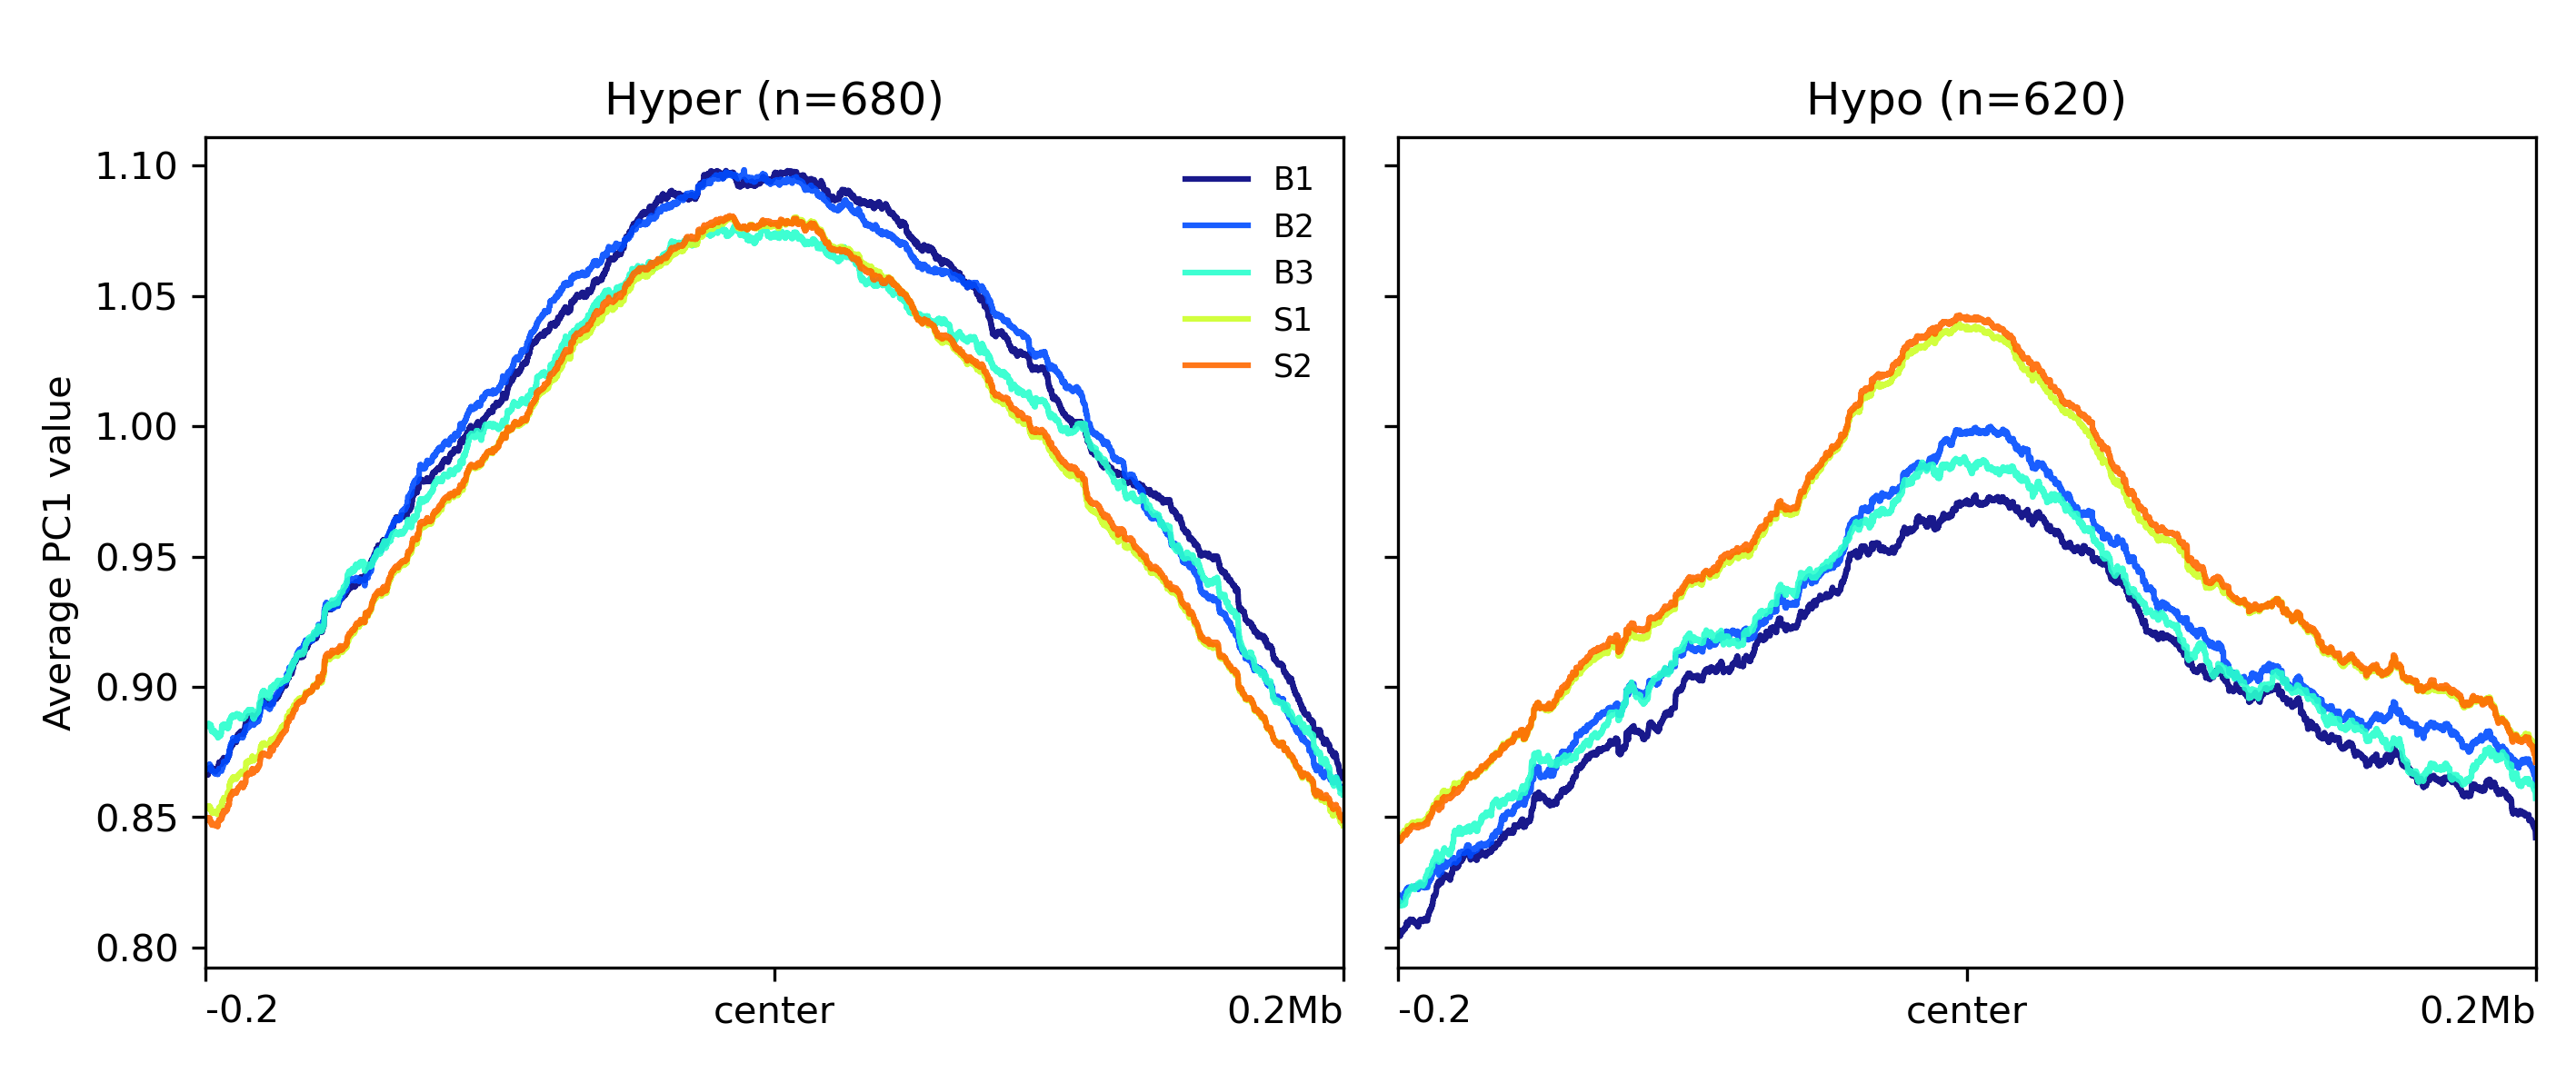

In [174]:
from IPython.display import Image
Image(filename='/home/lzz/atac/output/deeptools/matrix_bs_all_240k_center.png')

# 3.ATAC density AB

## 3.1 Up

In [108]:
import pandas as pd
dat = pd.read_csv('/home/lzz/hic/output/PC/regions.Up_b_vs_s.txt', sep='\t')
print(dat.shape)
dat.head()

(305, 27)


PeakID (cmd=annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph) (cmd=getDiffExpression.pl /home/u2204084007/output/hic//ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0)  \
0                                    chr10-130360000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1                                     chr18-81520000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2                                    chr12-115160000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3                                      chr6-40760000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
4                                     chr7-106760000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

     Chr      Start        End Strand  Peak Score  Focus Ratio/Region Size  \
0  chr10  130360000  130400000      +   -0.720641                      NaN   
1  chr18   81520000   81560000      +   -0.403031                      NaN   
2  chr12  115160000  115200000      +   -0.906716                      NaN   
3   chr6   40760000   40800000      +   -0.747445                      NaN   
4   chr7  106760000  106800000      +   -0.747274                      NaN   

   Annotation                Detailed Annotati

In [82]:
gtf_file = pd.read_csv('/home/lzz/genome/mm10.gtf', sep='\t', header=None, comment='#')
gtf_file

0        1           2        3        4  5  6  7  \
0        chr1   HAVANA        gene  3073253  3074322  .  +  .   
1        chr1   HAVANA  transcript  3073253  3074322  .  +  .   
2        chr1   HAVANA        exon  3073253  3074322  .  +  .   
3        chr1  ENSEMBL        gene  3102016  3102125  .  +  .   
4        chr1  ENSEMBL  transcript  3102016  3102125  .  +  .   
...       ...      ...         ...      ...      ... .. .. ..   
1860959  chrM  ENSEMBL  transcript    15289    15355  .  +  .   
1860960  chrM  ENSEMBL        exon    15289    15355  .  +  .   
1860961  chrM  ENSEMBL        gene    15356    15422  .  -  .   
1860962  chrM  ENSEMBL  transcript    15356    15422  .  -  .   
1860963  chrM  ENSEMBL        exon    15356    15422  .  -  .   

                                                         8  
0        gene_id "ENSMUSG00000102693.1"; gene_type "TEC...  
1        gene_id "ENSMUSG00000102693.1"; transcript_id ...  
2        gene_id "ENSMUSG00000102693.1"; transcript_id ...  
3        gene_id "ENSMUSG00000064842.1"; gene_type "snR...  
4        gene_id "ENSMUSG00000064842.1"; transcript_id ...  
...                                                    ...  
1860959  gene_id "ENSMUSG00000064371.1"; transcript_id ...  
1860960  gene_id "ENSMUSG00000064371.1"; transcript_id ...  
1860961  gene_id "ENSMUSG00000064372.1"; gene_type "Mt_...  
1860962  gene_id "ENSMUSG00000064372.1"; transcript_id ...  
1860963  gene_id "ENSMUSG00000064372.1"; transcript_id ...  

[1860964 rows x 9 columns]

In [109]:
filtered_gtf_file = gtf_file[gtf_file[8].str.contains('|'.join(dat['Gene Name']))]
filtered_gtf_file[0].value_counts()

0
chr5     1578
chr6     1539
chr11    1535
chr15    1392
chrX     1198
chr1     1179
chr2     1173
chr8     1155
chr7     1132
chr13     725
chr10     702
chr3      599
chr17     550
chr18     471
chr19     309
chr4      249
chr9      231
chr12     192
chr14     158
chr16     103
Name: count, dtype: int64

In [110]:
import csv
filtered_gtf_file.to_csv('/home/lzz/hic/output/PC/filtered_gtf_file_up.gtf', sep='\t', header=False, index=False, quoting=csv.QUOTE_NONE)

In [111]:
bedfile = pd.read_csv('/home/lzz/hic/output/PC/filtered_gtf_file_up.gtf', sep='\t', header=None)
bedfile = pd.DataFrame(bedfile[8].str.split('; ').tolist())
bedfile[3] = bedfile[3].str.replace('gene_name "', '')
bedfile[3] = bedfile[3].str.replace('"', '')
# bedfile[9] = [i[0] for i in bedfile[0].str.split('.')]
bedfile

0                                     1   \
0       gene_id "ENSMUSG00000102331.1"                    gene_type "lncRNA"   
1       gene_id "ENSMUSG00000102331.1"  transcript_id "ENSMUST00000192692.1"   
2       gene_id "ENSMUSG00000102331.1"  transcript_id "ENSMUST00000192692.1"   
3       gene_id "ENSMUSG00000102331.1"  transcript_id "ENSMUST00000192692.1"   
4       gene_id "ENSMUSG00000033774.4"            gene_type "protein_coding"   
...                                ...                                   ...   
16165  gene_id "ENSMUSG00000041633.14"  transcript_id "ENSMUST00000112572.2"   
16166  gene_id "ENSMUSG00000041633.14"  transcript_id "ENSMUST00000112572.2"   
16167  gene_id "ENSMUSG00000041633.14"  transcript_id "ENSMUST00000112572.2"   
16168  gene_id "ENSMUSG00000041633.14"  transcript_id "ENSMUST00000112572.2"   
16169  gene_id "ENSMUSG00000041633.14"  transcript_id "ENSMUST00000112572.2"   

                               2        3                                 4   \
0             gene_name "Gm19938"  level 2              mgi_id "MGI:5012123"   
1              gene_type "lncRNA"  Gm19938          transcript_type "lncRNA"   
2              gene_type "lncRNA"  Gm19938          transcript_type "lncRNA"   
3              gene_type "lncRNA"  Gm19938          transcript_type "lncRNA"   
4              gene_name "Npbwr1"  level 2               mgi_id "MGI:891989"   
...                           ...      ...                               ...   
16165  gene_type "protein_coding"  Kctd12b  transcript_type "protein_coding"   
16166  gene_type "protein_coding"  Kctd12b  transcript_type "protein_coding"   
16167  gene_type "protein_coding"  Kctd12b  transcript_type "protein_coding"   
16168  gene_type "protein_coding"  Kctd12b  transcript_type "protein_coding"   
16169  gene_type "protein_coding"  Kctd12b  transcript_type "protein_coding"   

                                        5              6   \
0      havana_gene "OTTMUSG00000049924.1";           None   
1            transcript_name "Gm19938-201"        level 2   
2            transcript_name "Gm19938-201"  exon_number 1   
3            transcript_name "Gm19938-201"  exon_number 2   
4      havana_gene "OTTMUSG00000050228.1";           None   
...                                    ...            ...   
16165        transcript_name "Kctd12b-202"  exon_number 2   
16166        transcript_name "Kctd12b-202"  exon_number 2   
16167        transcript_name "Kctd12b-202"  exon_number 1   
16168        transcript_name "Kctd12b-202"  exon_number 2   
16169        transcript_name "Kctd12b-202"  exon_number 2   

                                   7                     8   \
0                                None                  None   
1        transcript_support_level "1"  mgi_id "MGI:5012123"   
2      exon_id "ENSMUSE00001337496.1"               level 2   
3      exon_id "ENSMUSE00001339227.1"               level 2   
4                                None                  None   
...                               ...                   ...   
16165  exon_id "ENSMUSE00000516888.4"               level 2   
16166  exon_id "ENSMUSE00000516888.4"               level 2   
16167  exon_id "ENSMUSE00000692283.1"               level 2   
16168  exon_id "ENSMUSE00000516888.4"               level 2   
16169  exon_id "ENSMUSE00000516888.4"               level 2   

                                      9   ...  \
0                                   None  ...   
1                            tag "basic"  ...   
2           transcript_support_level "1"  ...   
3           transcript_support_level "1"  ...   
4                                   None  ...   
...                                  ...  ...   
16165  protein_id "ENSMUSP00000108191.1"  ...   
16166  protein_id "ENSMUSP00000108191.1"  ...   
16167  protein_id "ENSMUSP00000108191.1"  ...   
16168  protein_id "ENSMUSP00000108191.1"  ...   
16169  protein_id "ENSMUSP00000108191.1"  ...   

                                   

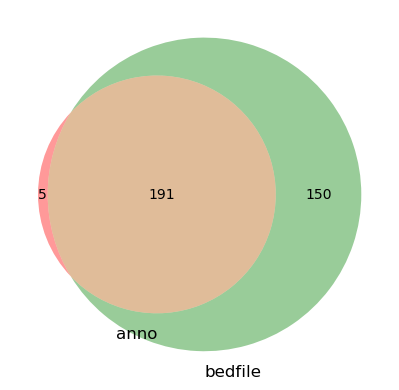

In [112]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
# Get the unique values from the 'Nearest Ensembl' column in anno DataFrame
anno_ensembl = set(dat['Gene Name'])

# Get the unique values from the '9' column in bedfile DataFrame
bedfile_ensembl = set(bedfile[3])

# Create the Venn diagram
venn2([anno_ensembl, bedfile_ensembl], set_labels=('anno', 'bedfile'))

# Display the plot
plt.show()
     

In [121]:
%%bash
computeMatrix scale-regions \
    -b 1000 -a 1000 \
    -R /home/lzz/atac/output/up_regulated_diff_anno.bed \
    -S $(ls /home/lzz/atac/data/bw/*.bigwig | grep T -v) \
    --skipZeros \
    -o /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.gz \
    --outFileSortedRegions /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.bed \
    --outFileNameMatrix /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.tab

In [122]:
%%bash
plotProfile -m /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.gz \
    -out /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.png \
    --perGroup \
    --plotTitle "Gain"

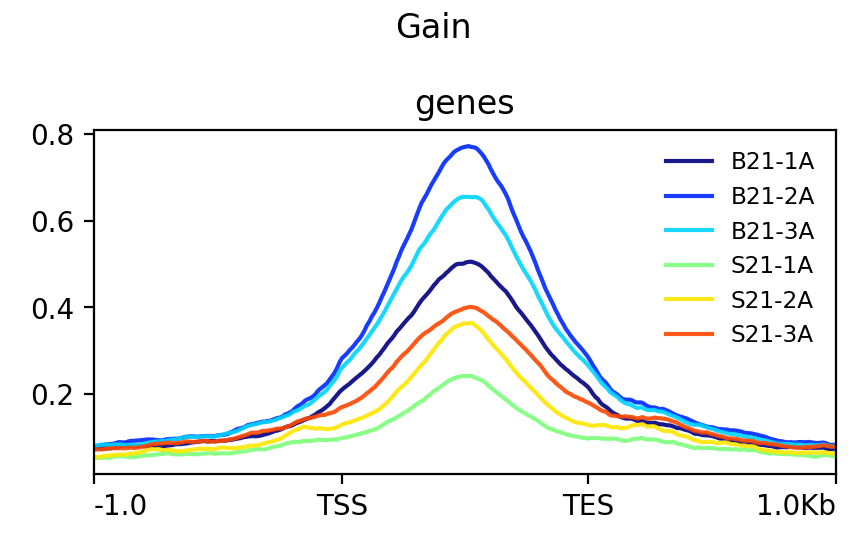

In [124]:
from IPython.display import Image
Image(filename = '/home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.png', width=400, height=400)

In [126]:
%%bash
plotHeatmap \
    -m /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno.gz\
    -out /home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno_heatmap.png \
    --heatmapHeight 15  \
    --plotTitle 'Up'

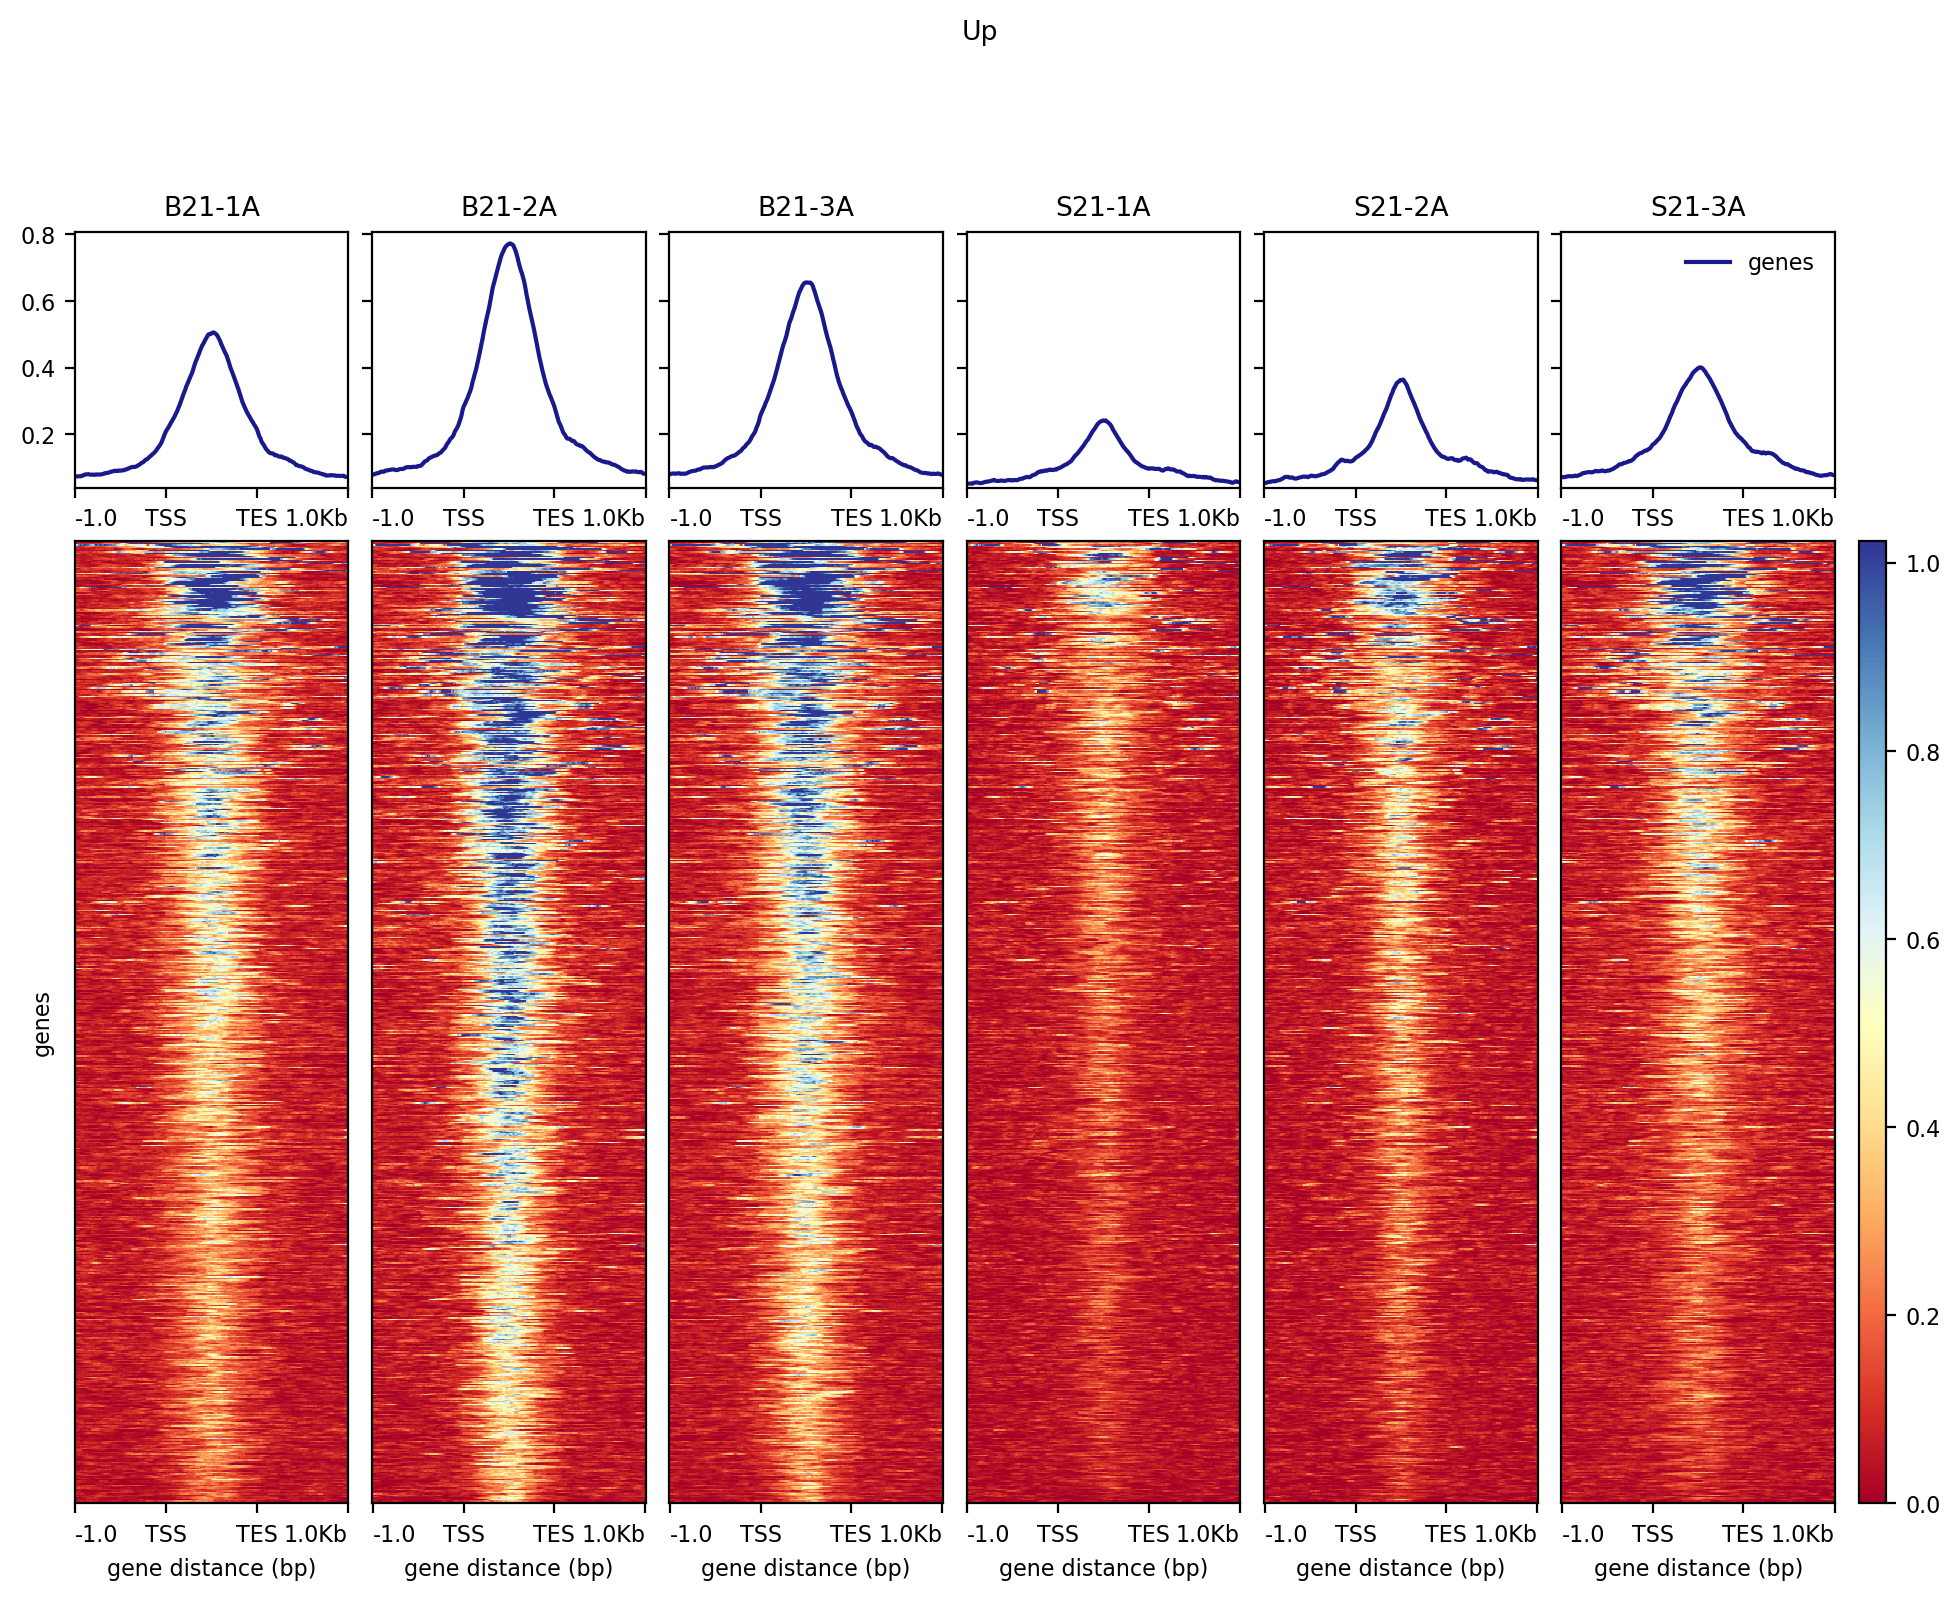

In [128]:
from IPython.display import Image
Image(filename = '/home/lzz/atac/output/deeptools/atac/up_regulated_diff_anno_heatmap.png', width=400, height=400)

## 3.2 Down

In [131]:
import pandas as pd
dat = pd.read_csv('/home/lzz/hic/output/PC/regions.Down_b_vs_s.txt', sep='\t')
print(dat.shape)
dat.head()

(264, 27)


PeakID (cmd=annotatePeaks.pl /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.txt mm10 -noblanks -bedGraph /home/u2204084007/cluster/HiC/data/pbs/S1/S1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/pbs/S2/S2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B1/B1.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B2/B2.40x80kb.PC1.bedGraph /home/u2204084007/cluster/HiC/data/blm/B3/B3.40x80kb.PC1.bedGraph) (cmd=getDiffExpression.pl /home/u2204084007/output/hic//ABpeak_intergrated_output.txt s s b b b -pc1 -export regions -log2fold 0)  \
0                                     chr19-27800000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1                                     chr17-66360000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
2                                      chr6-94280000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
3                                     chr10-70440000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
4                                      chr6-92760000                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

     Chr     Start       End Strand  Peak Score  Focus Ratio/Region Size  \
0  chr19  27800000  27840000      +    0.180673                      NaN   
1  chr17  66360000  66400000      +   -0.005986                      NaN   
2   chr6  94280000  94320000      +    0.210921                      NaN   
3  chr10  70440000  70480000      +   -0.413796                      NaN   
4   chr6  92760000  92800000      +   -0.155394                      NaN   

                              Annotation  \
0  intron (NM_

In [132]:
gtf_file = pd.read_csv('/home/lzz/genome/mm10.gtf', sep='\t', header=None, comment='#')
gtf_file

0        1           2        3        4  5  6  7  \
0        chr1   HAVANA        gene  3073253  3074322  .  +  .   
1        chr1   HAVANA  transcript  3073253  3074322  .  +  .   
2        chr1   HAVANA        exon  3073253  3074322  .  +  .   
3        chr1  ENSEMBL        gene  3102016  3102125  .  +  .   
4        chr1  ENSEMBL  transcript  3102016  3102125  .  +  .   
...       ...      ...         ...      ...      ... .. .. ..   
1860959  chrM  ENSEMBL  transcript    15289    15355  .  +  .   
1860960  chrM  ENSEMBL        exon    15289    15355  .  +  .   
1860961  chrM  ENSEMBL        gene    15356    15422  .  -  .   
1860962  chrM  ENSEMBL  transcript    15356    15422  .  -  .   
1860963  chrM  ENSEMBL        exon    15356    15422  .  -  .   

                                                         8  
0        gene_id "ENSMUSG00000102693.1"; gene_type "TEC...  
1        gene_id "ENSMUSG00000102693.1"; transcript_id ...  
2        gene_id "ENSMUSG00000102693.1"; transcript_id ...  
3        gene_id "ENSMUSG00000064842.1"; gene_type "snR...  
4        gene_id "ENSMUSG00000064842.1"; transcript_id ...  
...                                                    ...  
1860959  gene_id "ENSMUSG00000064371.1"; transcript_id ...  
1860960  gene_id "ENSMUSG00000064371.1"; transcript_id ...  
1860961  gene_id "ENSMUSG00000064372.1"; gene_type "Mt_...  
1860962  gene_id "ENSMUSG00000064372.1"; transcript_id ...  
1860963  gene_id "ENSMUSG00000064372.1"; transcript_id ...  

[1860964 rows x 9 columns]

In [133]:
filtered_gtf_file = gtf_file[gtf_file[8].str.contains('|'.join(dat['Gene Name']))]
filtered_gtf_file[0].value_counts()

0
chr14    3135
chr9     1927
chr19    1912
chrX     1721
chr1     1695
chr5     1644
chr6     1501
chr13    1437
chr15    1351
chr7     1299
chr10    1039
chr3      814
chr11     759
chr18     624
chr16     605
chr2      548
chr12     346
chr17     331
chr8      155
chr4      121
chrY        9
Name: count, dtype: int64

In [134]:
import csv
filtered_gtf_file.to_csv('/home/lzz/hic/output/PC/filtered_gtf_file_dw.gtf', sep='\t', header=False, index=False, quoting=csv.QUOTE_NONE)

In [135]:
bedfile = pd.read_csv('/home/lzz/hic/output/PC/filtered_gtf_file_dw.gtf', sep='\t', header=None)
bedfile = pd.DataFrame(bedfile[8].str.split('; ').tolist())
bedfile[3] = bedfile[3].str.replace('gene_name "', '')
bedfile[3] = bedfile[3].str.replace('"', '')
# bedfile[9] = [i[0] for i in bedfile[0].str.split('.')]
bedfile

0                                      1   \
0      gene_id "ENSMUSG00000048960.13"             gene_type "protein_coding"   
1      gene_id "ENSMUSG00000048960.13"  transcript_id "ENSMUST00000027056.11"   
2      gene_id "ENSMUSG00000048960.13"  transcript_id "ENSMUST00000027056.11"   
3      gene_id "ENSMUSG00000048960.13"  transcript_id "ENSMUST00000027056.11"   
4      gene_id "ENSMUSG00000048960.13"  transcript_id "ENSMUST00000027056.11"   
...                                ...                                    ...   
22968   gene_id "ENSMUSG00000095134.2"   transcript_id "ENSMUST00000167967.3"   
22969   gene_id "ENSMUSG00000095134.2"   transcript_id "ENSMUST00000167967.3"   
22970   gene_id "ENSMUSG00000095134.2"   transcript_id "ENSMUST00000167967.3"   
22971   gene_id "ENSMUSG00000095134.2"   transcript_id "ENSMUST00000167967.3"   
22972   gene_id "ENSMUSG00000095134.2"   transcript_id "ENSMUST00000167967.3"   

                                       2         3   \
0                       gene_name "Prex2"   level 2   
1              gene_type "protein_coding"     Prex2   
2              gene_type "protein_coding"     Prex2   
3              gene_type "protein_coding"     Prex2   
4              gene_type "protein_coding"     Prex2   
...                                   ...       ...   
22968  gene_type "unprocessed_pseudogene"  Mid1-ps1   
22969  gene_type "unprocessed_pseudogene"  Mid1-ps1   
22970  gene_type "unprocessed_pseudogene"  Mid1-ps1   
22971  gene_type "unprocessed_pseudogene"  Mid1-ps1   
22972  gene_type "unprocessed_pseudogene"  Mid1-ps1   

                                             4   \
0                          mgi_id "MGI:1923385"   
1              transcript_type "protein_coding"   
2              transcript_type "protein_coding"   
3              transcript_type "protein_coding"   
4              transcript_type "protein_coding"   
...                                         ...   
22968  transcript_type "unprocessed_pseudogene"   
22969  transcript_type "unprocessed_pseudogene"   
22970  transcript_type "unprocessed_pseudogene"   
22971  transcript_type "unprocessed_pseudogene"   
22972  transcript_type "unprocessed_pseudogene"   

                                        5              6   \
0      havana_gene "OTTMUSG00000047927.1";           None   
1              transcript_name "Prex2-201"        level 2   
2              transcript_name "Prex2-201"  exon_number 1   
3              transcript_name "Prex2-201"  exon_number 1   
4              transcript_name "Prex2-201"  exon_number 1   
...                                    ...            ...   
22968       transcript_name "Mid1-ps1-201"  exon_number 3   
22969       transcript_name "Mid1-ps1-201"  exon_number 4   
22970       transcript_name "Mid1-ps1-201"  exon_number 5   
22971       transcript_name "Mid1-ps1-201"  exon_number 6   
22972       transcript_name "Mid1-ps1-201"  exon_number 7   

                                      7                             8   \
0                                   None                          None   
1      protein_id "ENSMUSP00000027056.5"  transcript_support_level "1"   
2         exon_id "ENSMUSE00000604640.3"                       level 2   
3         exon_id "ENSMUSE00000604640.3"                       level 2   
4         exon_id "ENSMUSE00000604640.3"                       level 2   
...                                  ...                           ...   
22968     exon_id "ENSMUSE00001057680.1"                       level 2   
22969     exon_id "ENSMUSE00001076808.1"                       level 2   
22970     exon_id "ENSMUSE00000971381.1"                       level 2   
22971     exon_id "ENSMUSE00001024291.1"                       level 2   
22972     exon_id "ENSMUSE00000889347.2"                       level 2   

                                      9   ...           12  \
0                                   None  ...         None   
1                   mgi_id "MGI:1923385"  .

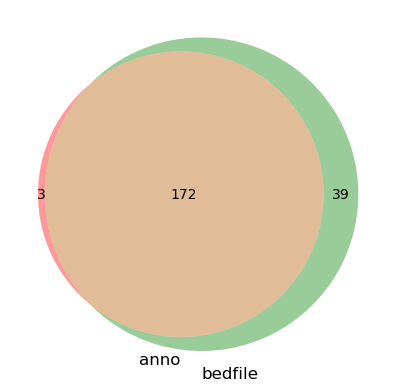

In [136]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt
# Get the unique values from the 'Nearest Ensembl' column in anno DataFrame
anno_ensembl = set(dat['Gene Name'])

# Get the unique values from the '9' column in bedfile DataFrame
bedfile_ensembl = set(bedfile[3])

# Create the Venn diagram
venn2([anno_ensembl, bedfile_ensembl], set_labels=('anno', 'bedfile'))

# Display the plot
plt.show()
     

In [152]:
%%bash
computeMatrix scale-regions \
    -b 1000 -a 1000 \
    -R /home/lzz/atac/output/down_regulated_diff_anno.bed \
    -S $(ls /home/lzz/atac/data/bw/*.bigwig | grep T -v) \
    --skipZeros \
    -o /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.gz \
    --outFileSortedRegions /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.bed \
    --outFileNameMatrix /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.tab

In [153]:
%%bash
plotProfile -m /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.gz \
    -out /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.png \
    --perGroup \
    --plotTitle "Loss"

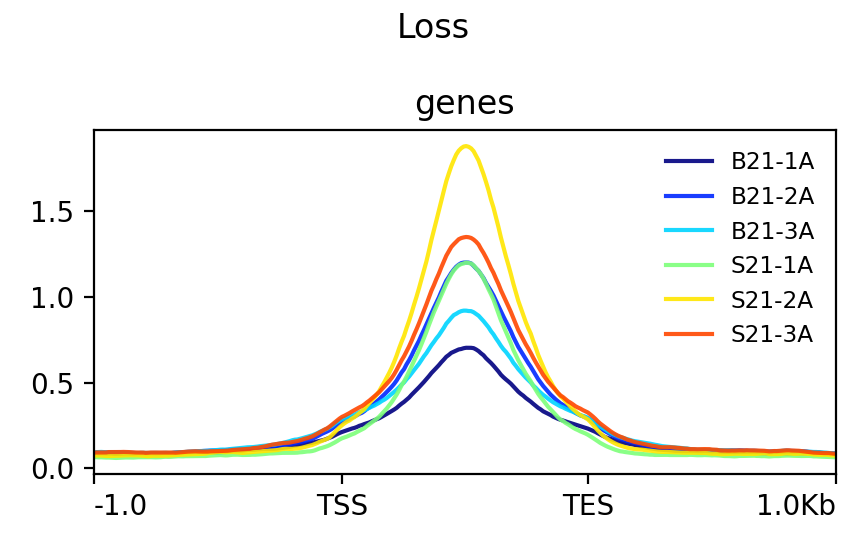

In [154]:
from IPython.display import Image
Image(filename = '/home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.png', width=400, height=400)

In [155]:
%%bash
plotHeatmap \
    -m /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno.gz\
    -out /home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno_heatmap.png \
    --heatmapHeight 15  \
    --plotTitle 'Down'

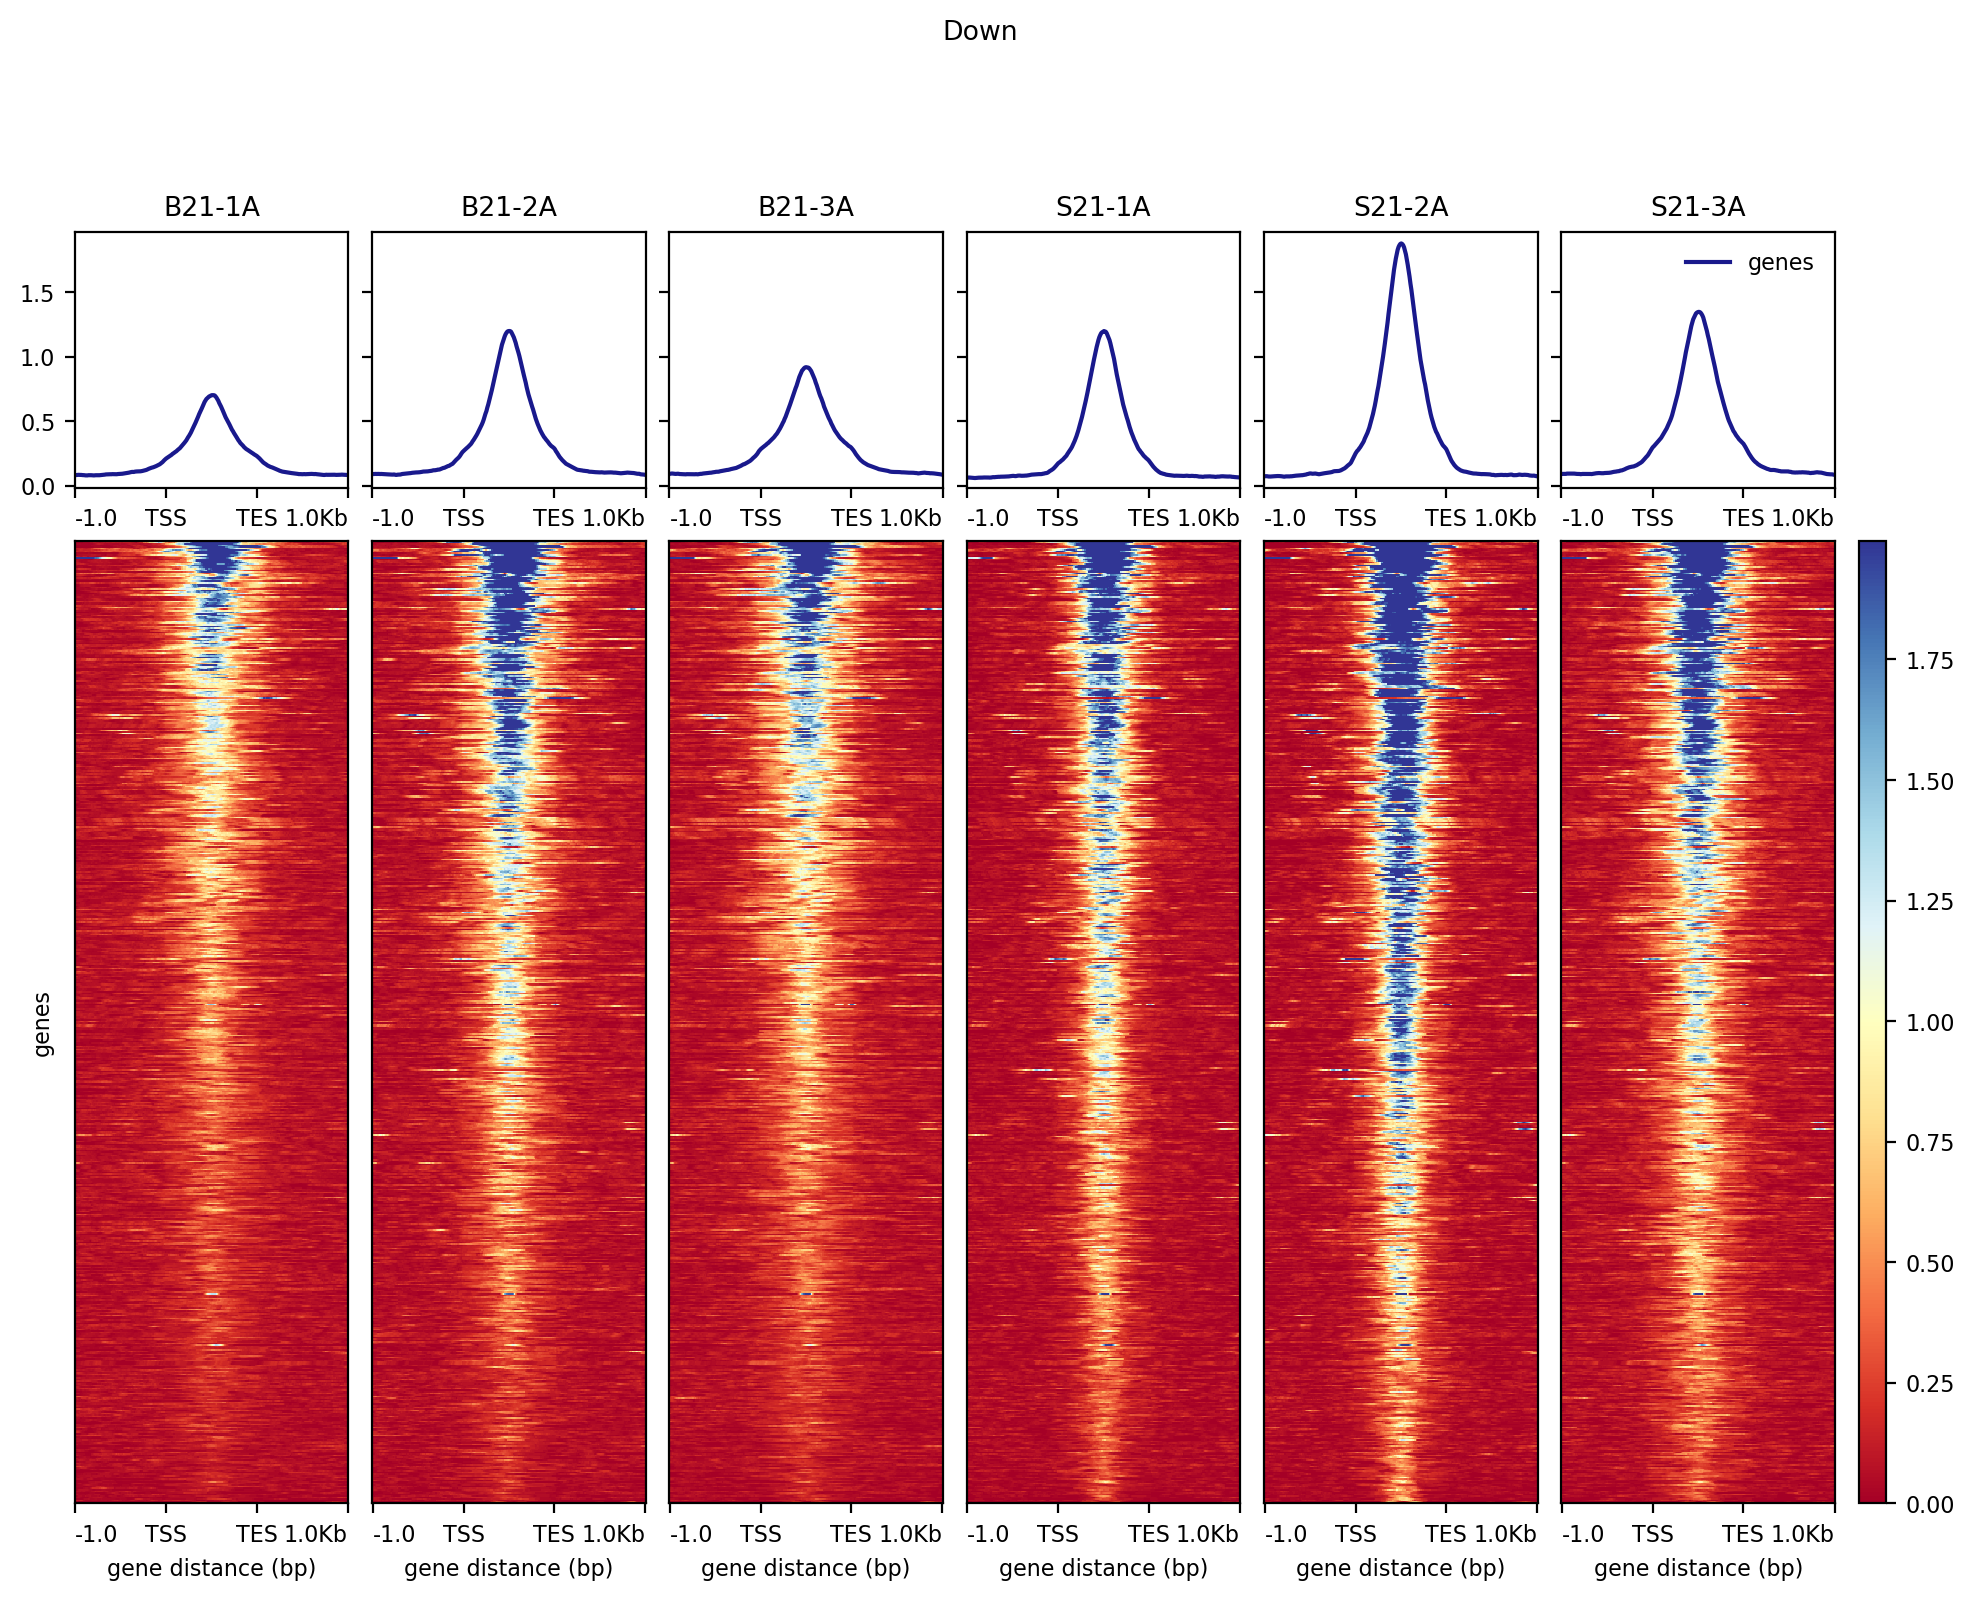

In [156]:
from IPython.display import Image
Image(filename = '/home/lzz/atac/output/deeptools/atac/dw_regulated_diff_anno_heatmap.png', width=400, height=400)